Chapter 12  
# Bayesian Linear Regression  
*Machine Learning Made Easy and Visual with Python*

In [1]:
# conda create -c conda-forge -n pymc_env "pymc>=5"
# conda activate pymc_env
# conda activate base

https://www.pymc.io/projects/docs/en/latest/installation.html

In [2]:
# ! pip install pymc

In [3]:
# ! pip install seaborn

## Import necessary libraries

In [5]:
from matplotlib.colors import ListedColormap  # Import module for creating color maps
import numpy as np  # Import library for numerical computations
import matplotlib.pyplot as plt  # Import library for plotting
import pandas as pd  # Import library for data manipulation
import pymc as pm  # Import PyMC library for Bayesian modeling
import scipy.stats as st  # Import statistical functions
import seaborn as sns  # Import seaborn for advanced visualizations

## Generate sample data

In [7]:
RANDOM_SEED = 1  # Set random seed for reproducibility
rng = np.random.default_rng(RANDOM_SEED)  # Initialize random number generator

In [8]:
size = 50  # Define number of samples
true_intercept = 1  # True intercept value
true_slope = 2  # True slope value

In [9]:
x = np.linspace(0, 1, size)  # Generate evenly spaced values for independent variable x in [0,1]
true_regression_line = true_intercept + true_slope * x  # Compute true regression line

In [10]:
y = true_regression_line + rng.normal(scale=0.5, size=size)  # Add Gaussian noise to generate observed data

In [11]:
data = pd.DataFrame(dict(x=x, y=y))  # Combine x and y into a pandas DataFrame

## Plot scatter points and true regression line

Text(0, 0.5, '$y$')

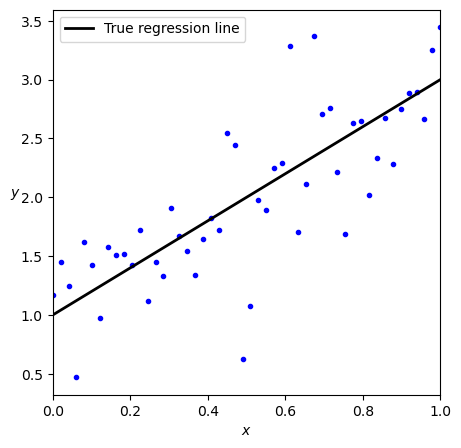

In [13]:
fig = plt.figure(figsize=(5, 5))  # Create figure and set size
ax = fig.add_subplot(111, xlabel="x", ylabel="y")  # Add subplot and set axis labels
plt.plot(x, y, 'b.')  # Plot observed data points as blue dots

ax.plot(x, true_regression_line, color='k', label="True regression line", lw=2.0)  # Plot true regression line
plt.legend(loc=0)  # Add legend
plt.xlim(0, 1)  # Set x-axis limits
plt.xlabel('$x$')  # Set x-axis label
plt.ylabel('$y$', rotation=0)  # Set y-axis label

In [14]:
## Create Bayesian linear regression model

In [15]:
with pm.Model() as basic_model:  # Define PyMC model context
    intercept = pm.Normal('alpha', mu=0, sigma=20)  # Prior for intercept: Normal(0,20)
    slope = pm.Normal('beta', mu=0, sigma=20)  # Prior for slope: Normal(0,20)
    sigma = pm.HalfNormal('sigma', sigma=20)  # Prior for residual standard deviation: HalfNormal(20)

    mu = intercept + slope * x  # Linear regression formula for expected value

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)  # Likelihood of observed data

    trace = pm.sample(draws=1000, chains=2, tune=200, random_seed=RANDOM_SEED)  # MCMC sampling

C:\Users\james\anaconda3\envs\pymc_env\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta, sigma]


C:\Users\james\anaconda3\envs\pymc_env\Lib\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 200 tune and 1_000 draw iterations (400 + 2_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


## Plot MCMC trace for parameters

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

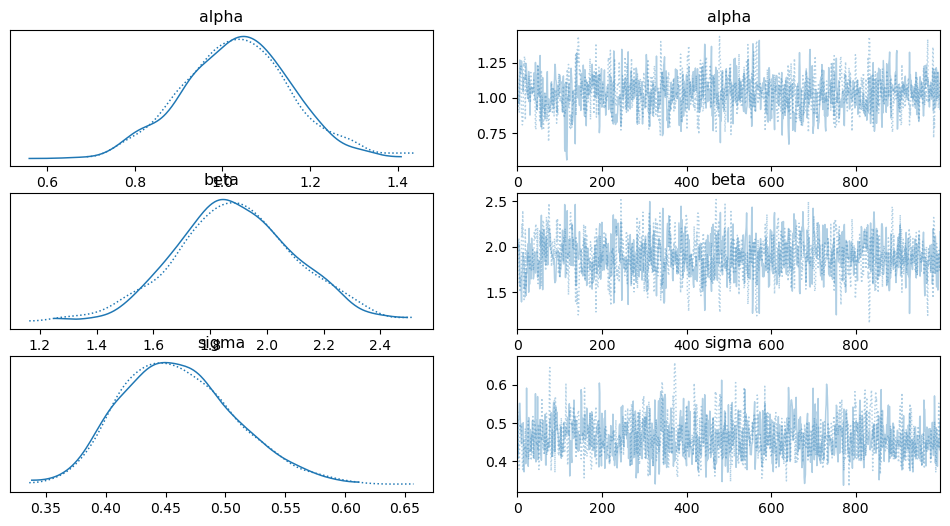

In [17]:
pm.plot_trace(trace)  # Visualize parameter traces to assess convergence

## Plot scatter with marginal posterior contour

Text(37.597222222222214, 0.5, 'beta')

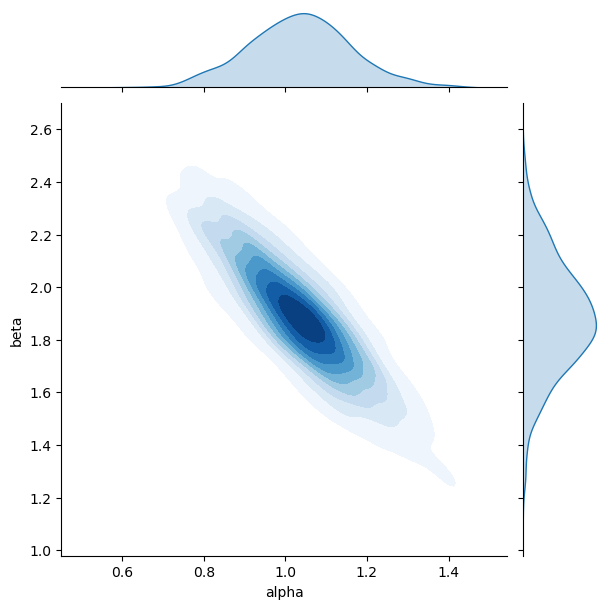

In [19]:
sns.jointplot(
    x=trace.posterior["alpha"].values.flatten(),  # Posterior samples for intercept
    y=trace.posterior["beta"].values.flatten(),   # Posterior samples for slope
    kind="kde", cmap="Blues", fill=True           # KDE contour plot filled with color
)
plt.xlabel("alpha")  # X-axis label for intercept
plt.ylabel("beta")   # Y-axis label for slope

## Posterior distribution histogram

array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

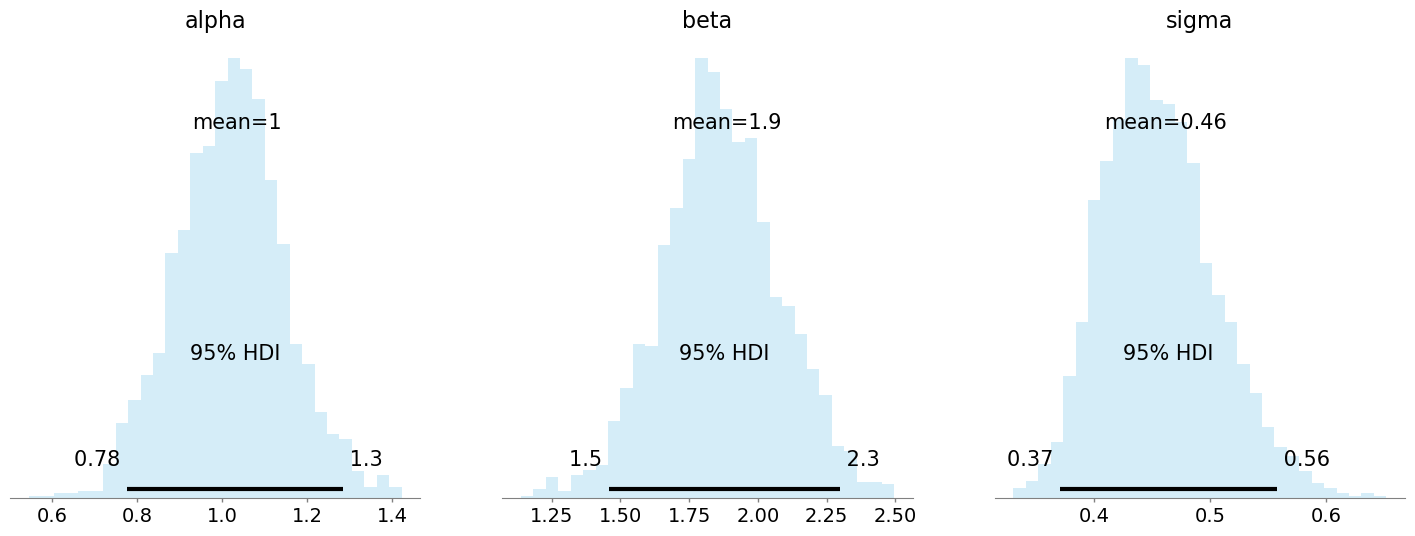

In [21]:
pm.plot_posterior(trace, kind="hist", figsize=(18, 6), hdi_prob=0.95, color='skyblue', bins=30)  # Histogram with 95% HDI

## Posterior distribution kernel density estimation

array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

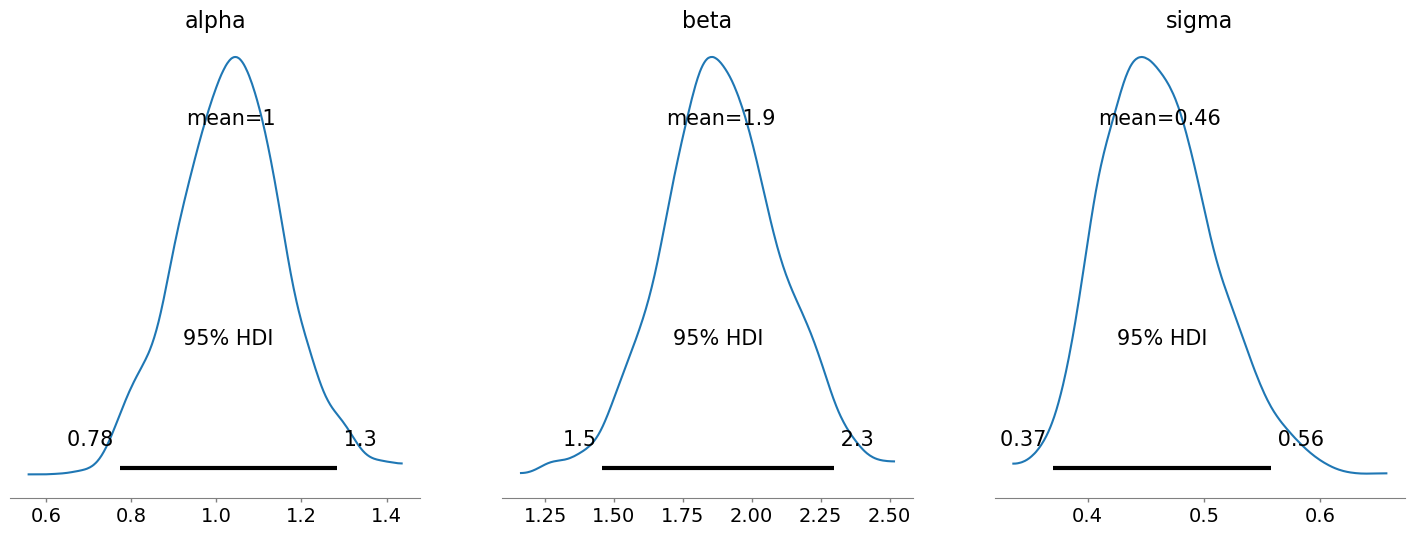

In [23]:
pm.plot_posterior(trace, kind="kde", figsize=(18, 6), hdi_prob=0.95)  # KDE plot with 95% HDI

## Compare predicted regression lines with true regression line

(0.0, 1.0)

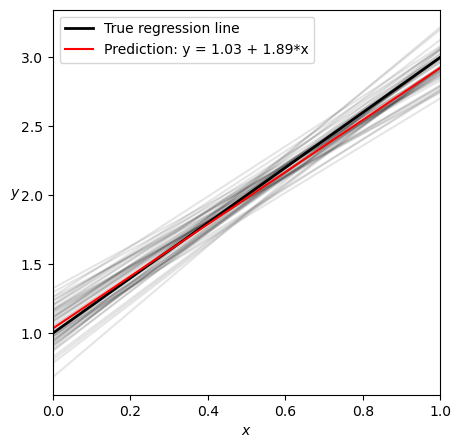

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))  # Create figure for predicted lines

idx_array = range(0, len(trace.posterior["alpha"].values.flatten()), 40)  # Select subset of posterior samples
alpha_m = trace.posterior["alpha"].values.mean()  # Posterior mean of intercept
beta_m = trace.posterior["beta"].values.mean()    # Posterior mean of slope

for idx in idx_array:  # Iterate over selected sample indices
    alpha = trace.posterior["alpha"].values.flatten()[idx]  # Intercept sample
    beta = trace.posterior["beta"].values.flatten()[idx]    # Slope sample
    plt.plot(x, alpha + beta * x, c='k', alpha=0.1)  # Plot regression line from sample

ax.plot(x, true_regression_line, color='k', label="True regression line", lw=2.0)  # Plot true regression line

label_2 = 'Prediction: y = {:.2f} + {:.2f}*x'.format(alpha_m, beta_m)  # Label for predicted mean line
plt.plot(x, alpha_m + beta_m * x, c='r', label=label_2)  # Plot posterior mean regression line
plt.xlabel('$x$')  # X-axis label
plt.ylabel('$y$', rotation=0)  # Y-axis label
plt.legend(loc=2)  # Add legend
plt.xlim(0, 1)  # Set x-axis limits